# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Support Vector Machines (SVM)

###   
In this section we use the feature matrices and response vectors with features selected in chapter 2. 


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')

## 3.0. SETTINGS

### (1) Choose the Dataset Version you want

##### Whole Feature Matrix (Features not pre-selected)
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data

##### Reduced Feature Matrix (Features pre-selected)
VERSION = 1.1; Reduced Feature Matrix with only ratios                                  
VERSION = 2.1;  Reduced Feature Matrix with ratios + saisonality + other market data



In [2]:
### Chose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 1.1
"""
INSERT NUMBER 1, 2, 1.1 or 2.1
"""



# Defining sel_state variable for easier printing out    
if VERSION == 1:
    sel_version = 'Based on whole original Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2:
    sel_version = 'Based on whole original Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
elif VERSION == 1.1:
    sel_version = 'Based on reduced Dataset with only the Ratios Dataset as predicive Features.'
elif VERSION == 2.1:
    sel_version = 'Based on reduced Dataset with Ratios + Seasonality + other Market Data as predictive Features.'
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1')

### (2) If you chose VERSION 1.1. or VERSION 2.1:  (Reduced Feature Matrix)                                                                  
### => Choose with which method you want to have the features been pre-selected /reduced

##### You have the choice between:
mySELECTION  = RF ; Features pre-selected with Random Forest Classifier                                                           
mySELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)                                         

##### By Default;
If VERSION 1 or VERSION 2 was chosen above: SELECTION = none by Default; no features pre-selected. You don't need to define variable mySELECTION.

In [3]:
### Choose whether you want the datasets with features selected with RF or PCA or the original file
mySELECTION = 'RF'
"""
INSERT WISHED METHOD 'RF', 'PCA'
"""



# This is the control loop. If something has been chosen wrong, it returns an error with explanation.
if VERSION == 1 or VERSION == 2:
    SELECTION = 'none'
elif VERSION == 1.1 or VERSION == 2.1:
    SELECTION = mySELECTION
    if mySELECTION is not 'RF' and mySELECTION is not 'PCA':
        raise ValueError('Because VERSION '+str(VERSION)+' is chosen, mySELECTION must be set as either RF or PCA.')
else: raise ValueError('VERSION must be either 1, 2, 1.1 or 2.1. mySELECTION must be chosen as either RF or PCA.')

# Defining of sel_feat (Selected Feature Selection Method) variable and briefing for later.   
if SELECTION == 'RF':
    sel_feat = 'Random Forest (RF)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
    briefing = ('You chose dataset VERSION '+str(VERSION)+' and SELECTION method '+str(SELECTION)+'.'+'\n'+'Features therefore pre-selected with '+str(sel_feat)+'.')
elif SELECTION == 'none':
    sel_feat = 'No Feature Selection Method available.'
    briefing = ('You chose VERSION '+str(VERSION)+'. This Version has no Feature Selection Method because Feature Matrix is whole, not reduced.'+'\n'+'SELECTION is therefore "none" by Default.')
else: raise ValueError('mySELECTION must be chosen as either RF or PCA')
print('You chose SELECTION method '+str(sel_feat)+'.')
#print(sel_feat)

You chose SELECTION method Random Forest (RF).


### (3) SUMMARY OF SETTINGS

In [4]:
print(briefing, '\n')
print('VERSION '+str(VERSION)+' is '+str(sel_version),'\n')
print('You are now done with the Settings. You can run the whole Code now by Default.')

You chose dataset VERSION 1.1 and SELECTION method RF.
Features therefore pre-selected with Random Forest (RF). 

VERSION 1.1 is Based on reduced Dataset with only the Ratios Dataset as predicive Features. 

You are now done with the Settings. You can run the whole Code now by Default.


## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [4]:
####################### NEW COMMENT
# In version 1 und 2; ganze Feature matrix und ganzen Response vector rein? ODER gesplittet?
# dann müsste in DataPrep split gemacht werden für datenset ohne feature pre-selection
# abgespeichert in generated_splits ohne Unterordner
# hier eingelesen als X_train und y_train und X_test und y_test
#######################


### import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if VERSION == 1: 
# features not pre-selected, only ratios
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 2: 
# features not pre-selected, ratios + seasonality + market data
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
    y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)
elif VERSION == 1.1: 
# features pre-selected, only ratios
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif VERSION == 2.1: 
# features pre-selected, ratios + seasonality + market data
    if SELECTION == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif SELECTION == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1, 2, 1.1 or 2.1, mySELECTION must be chosen as either RF or PCA.')
    
    
display(X_test_s.shape)

(710, 20)

#### Train-Test-split for whole original files. Automatically executed only if VERSION = 1 or 2.

In [6]:
####################### NEW COMMENT
# Split could also be already done in Datapreparation file because there we have more space etc.^ maybe
# but it can also be made here doesnt matterrr
#######################


# For VERSION == 1 or 2 -> train-test-split for the importet sets must be done
if VERSION == 1 or VERSION == 2:
    # import package imputer
    from sklearn.preprocessing import Imputer
    # # Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Use a median fill for train
    imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
    imputed_dataset.columns = X_train.columns
    imputed_dataset.index = X_train.index
    X_train = imputed_dataset

    # Use a median fill for the test set
    imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
    imputed_dataset.columns = X_test.columns
    imputed_dataset.index = X_test.index
    X_test = imputed_dataset

    # Extract the feature labels
    feature_labels = list(X)
    print('Type of feature_labels = ' + str(type(feature_labels)), '\n')

else: print('No Train/Test split needed for chosen VERSION '+str(VERSION)+
            '. Loaded Datasets were already pre-splitted and imputed in'+'\n'+'Feature Selection (Chapter 2).')
display(X_train_s.shape)
display(X_test_s.shape)
    


No Train/Test split needed for chosen VERSION 1.1. Loaded Datasets were already pre-splitted and imputed in
Feature Selection (Chapter 2).


(2836, 20)

(710, 20)

### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [7]:
# print status
print('Features Selected with ' + str(sel_feat)+'.')
print('Version ' + str(VERSION) + '; ' + str(sel_version), '\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train.shape)+'\n')
    print('Feature Matrix X (Train) with no Feature pre-Selection:')
    display(X_train[0:3])
    print("")
    print('Response Vector y (Train) after no Feature pre-Selection:')
    display(y_train[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Train) ' + '= ' + str(X_train_s.shape), '\n')
    print('Feature Matrix X (Train) with Selected Features:'+'\n')
    display(X_train_s[0:3])
    print("")
    print('Response Vector y (Train) after Feature Selection:')
    display(y_train_s[0:3])

Features Selected with Random Forest (RF).
Version 1.1; Based on reduced Dataset with only the Ratios Dataset as predicive Features. 

Shape (rows, columns) of Feature Matrix X (Train) = (2836, 20) 

Feature Matrix X (Train) with Selected Features:



,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
0,15.633,15.468,20.773,18.484,9.957,0.0354,0.547,5.963,1.811,18.484,13.678,10.644,3.703,0.932,0.108,0.291,0.332,0.843,0.623,1.181
1,17.296,17.203,25.089,39.232,8.509,0.0398,0.461,5.702,2.189,39.232,1.521,9.246,0.689,0.441,0.368,0.815,0.146,0.201,2.175,0.668
2,9.209,9.135,12.337,13.062,1.993,0.0268,0.911,2.248,1.076,13.062,0.380,12.474,2.034,1.000,0.152,0.044,0.357,0.906,0.337,3.048



Response Vector y (Train) after Feature Selection:


,0
0,0
1,1
2,0


### Test Set

In [8]:
# print status
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(VERSION) + '; ' + str(sel_version),'\n')

# print properties and head
if VERSION == 1 or VERSION == 2:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test.shape)+'\n')
    print('Feature Matrix X (Test) with no Feature pre-Selection:')
    display(X_test[0:3])
    print("")
    print('Response Vector y (Test) after no Feature pre-Selection:')
    display(y_test[0:3])
    print("")
else:
    print('Shape (rows, columns) of Feature Matrix X (Test) ' + '= ' + str(X_test_s.shape)+'\n')
    print('Feature Matrix X (Test) with Selected Features:')
    display(X_test_s[0:3])
    print("")
    print('Response Vector y (Test) after Feature Selection:')
    display(y_test_s[0:3])

Features Selected with Random Forest (RF)
Version 1.1; Based on reduced Dataset with only the Ratios Dataset as predicive Features. 

Shape (rows, columns) of Feature Matrix X (Test) = (710, 20)

Feature Matrix X (Test) with Selected Features:


,pe_op_dil,pe_op_basic,CAPEI,pe_exi,pcf,divyield,bm,PEG_ltgforward,ptb,pe_inc,PEG_1yrforward,evm,ps,fcf_ocf,invt_act,at_turn,pretret_noa,gpm,dpr,PEG_trailing
0,16.224,16.127,20.983,16.224,10.484,0.0187,0.254,1.330,4.189,16.224,1.414,8.585,3.318,0.863,0.025,0.828,1.148,0.428,0.287,1.022
1,16.489,16.311,21.663,18.555,7.709,0.0122,0.235,1.572,4.281,18.555,1.737,13.619,2.379,0.902,0.157,0.223,0.358,0.279,0.199,1.147
2,9.520,9.520,16.327,15.681,8.490,0.0343,0.513,6.149,2.198,15.550,-0.973,6.716,3.293,0.934,0.078,0.355,0.396,0.903,0.792,1.022



Response Vector y (Test) after Feature Selection:


,0
0,1
1,0
2,1


### Define Variables for further use

In [5]:
if VERSION == 1 or VERSION == 2:
    feature_train = X_train
    feature_test = X_test
    response_train = y_train
    response_test = y_test
if VERSION == 1.1 or VERSION == 2.1:
    feature_train = X_train_s
    feature_test = X_test_s
    response_train = y_train_s
    response_test = y_test_s

## 3.2. SVM

### Two different SVM tests are applied:
#### => SVM1 = SVM with random parameters
#### => SVM2 = SVM with other parameters

### 3.2.1. SVM1 : SVM with random parameters

### Kernel: rbf

In [9]:
# Create pipeline object with standard scaler and SVC estimator
# Standardscaler standardizes the input variables
pipe1 = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC(random_state=0))])

In [10]:
# Define parameter grid
param_grid1 = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]},
              {'scaler': [StandardScaler(), None],
               'classifier': [LogisticRegression()],
               'classifier__C': [10, 100]}]

In [11]:
# Run grid search
grid1 = GridSearchCV(pipe1, param_grid1, cv=5, n_jobs=-1)
grid1.fit(feature_train, response_train)

In [12]:
# Print results
print('Best CV accuracy: {:.2f}'.format(grid1.best_score_),'\n')
print('Test score:       {:.2f}'.format(grid1.score(feature_test, response_test)))
print('')
print('Best parameters: {}'.format(grid1.best_params_))

Best CV accuracy: 0.61 

Test score:       0.65
Best parameters: {'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'classifier__C': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [13]:
# Predict classes
y_pred1 = grid1.predict(feature_test)
    
print('Predicted Response Vector based on Feature Test Set:')
display(y_pred1[0:20])

Predicted Response Vector based on Feature Test Set:


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [14]:
# Metrics of Classification

m_text = 'Metrics of Classification with SVM1 (random parameters), kernel rbf:'+'\n'
c_text = 'Confusion Matrix with SVM1 (random parameters), kernel rbf:'+'\n'

print(m_text)
print(metrics.classification_report(response_test, y_pred1))
print(c_text)
print(metrics.confusion_matrix(response_test, y_pred1))

Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.70      0.33      0.45       305
          1       0.64      0.90      0.75       405

avg / total       0.67      0.65      0.62       710

Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[100 205]
 [ 42 363]]


### 3.2.1. SVM2 : SVM with other parameters

### Kernel: linear

In [15]:
# Create pipeline object with standard scaler and SVC estimator
# Standardscaler standardizes the input variables
pipe2 = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC(random_state=0))])

In [16]:
# Define parameter grid
param_grid2 = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='linear')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]},
              {'scaler': [StandardScaler(), None],
               'classifier': [LogisticRegression()],
               'classifier__C': [10, 100]}]

In [17]:
# Run grid search
grid2 = GridSearchCV(pipe2, param_grid2, cv=5, n_jobs=-1)
grid2.fit(feature_train, response_train)


In [18]:
# Print results
print('Best CV accuracy: {:.2f}'.format(grid2.best_score_))
print('Test score:       {:.2f}'.format(grid2.score(feature_test, response_test)))
print('')
print('Best parameters: {}'.format(grid2.best_params_))

Best CV accuracy: 0.61
Test score:       0.65

Best parameters: {'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'classifier__C': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [19]:
# Predict classes
y_pred2 = grid2.predict(feature_test)

print('Predicted Response Vector based on Feature Test Set:')
display(y_pred2[0:20])

Predicted Response Vector based on Feature Test Set:


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [20]:
# Metrics of Classification

m_text = 'Metrics of Classification with SVM2 (random parameters), kernel linear:'+'\n'
c_text = 'Confusion Matrix with SVM2 (random parameters), kernel linear:'+'\n'

print(m_text)
print(metrics.classification_report(response_test, y_pred2))
print(c_text)
print(metrics.confusion_matrix(response_test, y_pred2))


Metrics of Classification with SVM2 (random parameters), kernel linear:

             precision    recall  f1-score   support

          0       0.70      0.33      0.45       305
          1       0.64      0.90      0.75       405

avg / total       0.67      0.65      0.62       710

Confusion Matrix with SVM2 (random parameters), kernel linear:

[[100 205]
 [ 42 363]]


### Kernel: poly

In [21]:
# Create pipeline object with standard scaler and SVC estimator
pipe3 = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC(random_state=0))])

In [22]:
# Define parameter grid
param_grid3 = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel= "poly")],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]},
              {'scaler': [StandardScaler(), None],
               'classifier': [LogisticRegression()],
               'classifier__C': [10, 100]}]

In [23]:
# Run grid search
grid3 = GridSearchCV(pipe3, param_grid3, cv=5, n_jobs=-1)
grid3.fit(feature_train, response_train)

KeyboardInterrupt: 

In [ ]:
# Print results
print('Best CV accuracy: {:.2f}'.format(grid3.best_score_)+'\n')
print('Test score:       {:.2f}'.format(grid3.score(feature_test, response_test))+'\n')
print('')
print('Best parameters: {}'.format(grid3.best_params_))

In [ ]:
# Predict classes
y_pred3 = grid3.predict(feature_test)

print('Predicted Response Vector based on Feature Test Set:')
display(y_pred3[0:20])

In [ ]:
# Metrics of Classification

m_text = 'Metrics of Classification with SVM3 (random parameters), kernel poly:'+'\n'
c_text = 'Confusion Matrix with SVM3 (random parameters), kernel poly:'+'\n'

print(m_text)
print(metrics.classification_report(response_test, y_pred3))
print(c_text)
print(metrics.confusion_matrix(response_test, y_pred3))


## 3.3. Logistic Regression

### Three different versions are applied:
#### => LogReg = Logistic Regression with parameters from gridsearch
#### => LogReg1 = Logistic Regression with classweight unbalanced
#### => LogReg2 = Logistic Regression with classweight balanced

### 3.3.1. LogReg: parameters from gridsearch

In [6]:
# Import necessary functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
# Create k-Fold CV and LogReg object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                            verbose=0, warm_start=False)
# Run CV and print results
scores =  cross_val_score(logReg, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.5915493  0.59330986 0.61022928 0.62786596 0.61130742]
CV accuracy on train set:  0.607 +/-  0.013


In [8]:
# CV AUC score on train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.618 +/-  0.021


In [10]:
from sklearn.model_selection import cross_validate
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.13586044, 0.20974946, 0.11179948, 0.19413924, 0.17912054]),
 'score_time': array([0.02305961, 0.01685047, 0.00450802, 0.00601602, 0.00451207]),
 'test_accuracy': array([0.5915493 , 0.59330986, 0.61022928, 0.62786596, 0.61130742]),
 'test_recall': array([0.85151515, 0.83333333, 0.82674772, 0.86322188, 0.85106383]),
 'test_roc_auc': array([0.59596384, 0.63908836, 0.59897576, 0.64564124, 0.6094802 ]),
 'train_accuracy': array([0.6212522 , 0.61552028, 0.61480829, 0.60379022, 0.61057269]),
 'train_recall': array([0.83675019, 0.86940015, 0.83308042, 0.86039454, 0.84446131]),
 'train_roc_auc': array([0.63701718, 0.62571868, 0.63668864, 0.62530776, 0.63297698])}

In [11]:
# print scores
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.6131887351079371
Validation set scores (CV=5):  0.606852362703903
Test set accuracy :  0.6380281690140845


#### Prediction

In [12]:
# define y predicted
y_pred = logReg.fit(feature_train, response_train).predict(feature_test)
display(y_pred[0:20])

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [13]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.70      0.33      0.45       305
          1       0.64      0.89      0.74       405

avg / total       0.66      0.65      0.62       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[101 204]
 [ 44 361]]


#### Plot Confusion matrix non normalized

Confusion matrix, without normalization
[[101 204]
 [ 44 361]]


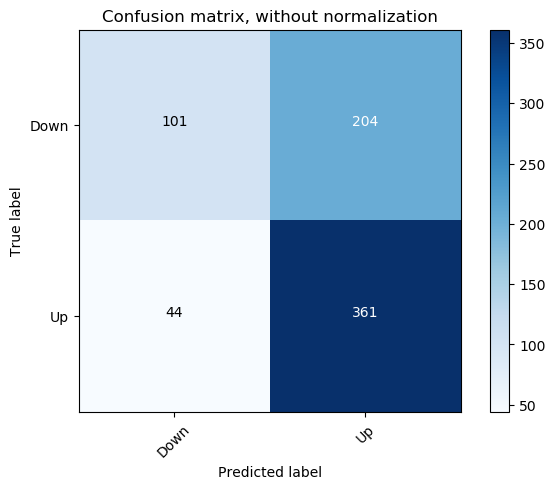

In [14]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')

#### Plot normalized confusion matrix

Normalized confusion matrix
[[0.33 0.67]
 [0.11 0.89]]


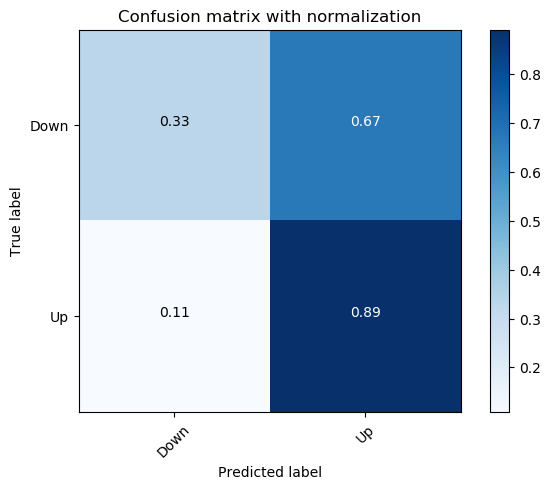

In [15]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')

##### different precision scores

In [16]:
print('Precision scores for different input data')
print(55*'_')
print('')
# precision train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision prediction
scores = cross_val_score(logReg, feature_test, y_pred, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred, cv=kFold , scoring = 'precision')
print('CV precision on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.618 +/-  0.009

CV precision on test set:  0.636 +/-  0.012

CV precision on test prediction set:  0.954 +/-  0.009

CV precision on prediction set:  0.796 +/-  0.000



##### different recall scores

In [17]:
print('Recall scores for different input data')
print(55*'_')
print('')
# recall train set
scores = cross_val_score(logReg, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall test set
scores = cross_val_score(logReg, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall prediction
scores = cross_val_score(logReg, feature_test, y_pred, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall y true and y predicted set
scores = cross_val_score(logReg, response_test, y_pred, cv=kFold , scoring = 'recall')
print('CV recall on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.845 +/-  0.013

CV recall on test set:  0.783 +/-  0.028

CV recall on test prediction set:  0.993 +/-  0.010

CV recall on prediction set:  1.000 +/-  0.000


#### Plot ROC_AUC curve

##### Plot with absolut numbers

In [18]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

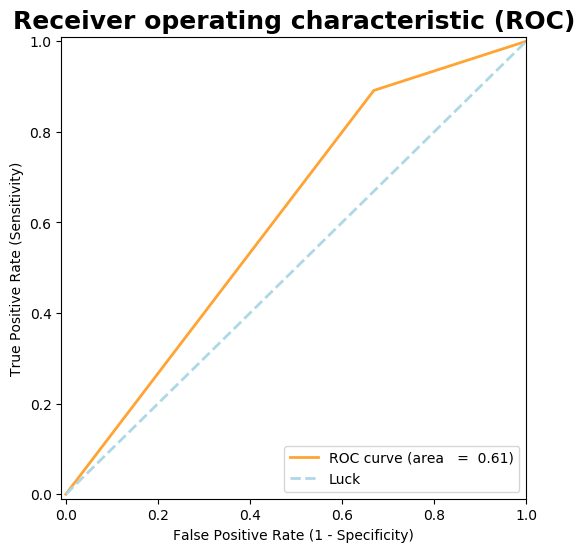

In [19]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold', fontsize =18)
plt.legend(loc= "lower right")

##### Plot with probabilites

In [20]:
# define probabilities of prediction
probas_ = logReg.fit(feature_train, response_train).predict_proba(feature_test)

In [21]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas_[:, 1])
roc_auc = metrics.auc(fpr , tpr)

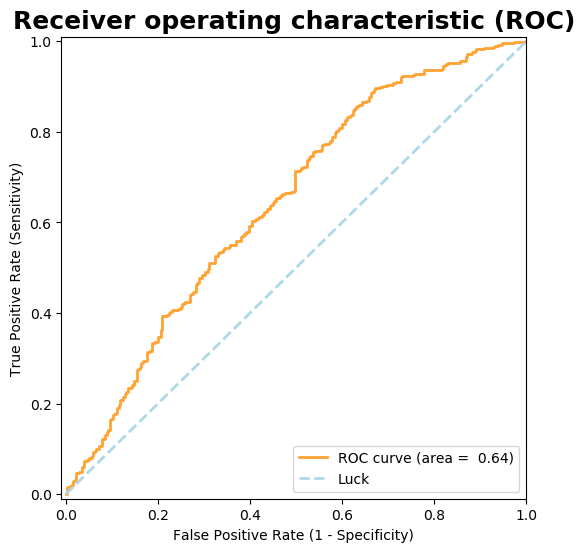

In [22]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr, lw=2,
         label = 'ROC curve (area = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

### 3.3.2. LogReg1: classweight unbalanced

In [7]:
# Import necessary functions
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
# Create k-Fold CV and LogReg object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg1 = LogisticRegression()
# Run CV and print results
scores =  cross_val_score(logReg1, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.58098592 0.59859155 0.60141093 0.62081129 0.6024735 ]
CV accuracy on train set:  0.601 +/-  0.013


In [8]:
# CV AUC score on train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.614 +/-  0.021


In [9]:
from sklearn.model_selection import cross_validate
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg1, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.18749738, 0.19401598, 0.15994096, 0.14638901, 0.15992498]),
 'score_time': array([0.14939833, 0.17697167, 0.04059172, 0.03609753, 0.03258705]),
 'test_accuracy': array([0.58098592, 0.59859155, 0.60141093, 0.62081129, 0.6024735 ]),
 'test_recall': array([0.84545455, 0.84848485, 0.82978723, 0.87234043, 0.86018237]),
 'test_roc_auc': array([0.59051439, 0.63632544, 0.59460806, 0.64050727, 0.60819771]),
 'train_accuracy': array([0.61992945, 0.60802469, 0.60863817, 0.59585721, 0.60792952]),
 'train_recall': array([0.84813971, 0.88003037, 0.83687405, 0.86722307, 0.85660091]),
 'train_roc_auc': array([0.63429296, 0.62203316, 0.63339524, 0.62170481, 0.62956271])}

In [10]:
# print scores
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg1.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.6080758064900135
Validation set scores (CV=5):  0.600854637048834
Test set accuracy :  0.6338028169014085


#### Prediction

In [11]:
# define y predicted
y_pred1 = logReg1.fit(feature_train, response_train).predict(feature_test)
display(y_pred1[0:20])

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [12]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred1))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred1))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.68      0.31      0.42       305
          1       0.63      0.89      0.74       405

avg / total       0.65      0.64      0.60       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[ 94 211]
 [ 45 360]]


#### Plot Confusion matrix non normalized

Confusion matrix, without normalization
[[ 94 211]
 [ 45 360]]


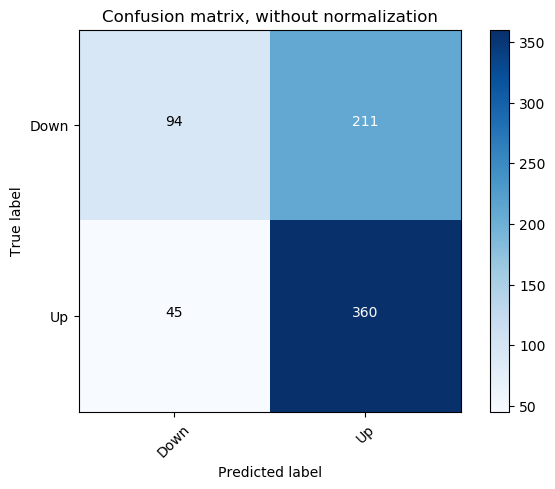

In [13]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred1)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')

#### Plot normalized confusion matrix

Normalized confusion matrix
[[0.31 0.69]
 [0.11 0.89]]


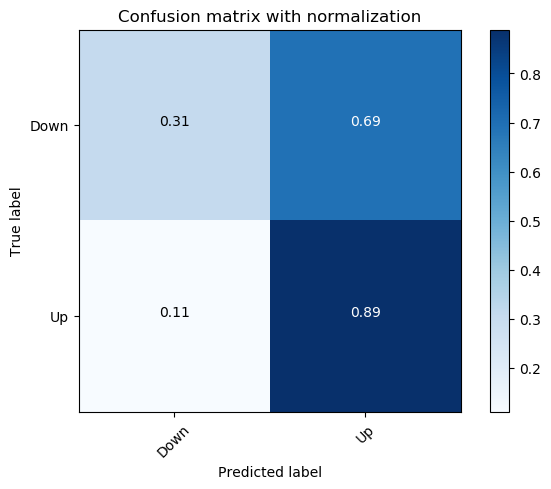

In [14]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred1)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')

##### different precision scores

In [15]:
print('Precision scores for different input data')
print(55*'_')
print('')
# precision train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision test set
scores = cross_val_score(logReg1, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision prediction
scores = cross_val_score(logReg1, feature_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision y true and y predicted set
scores = cross_val_score(logReg1, response_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.613 +/-  0.008

CV precision on test set:  0.620 +/-  0.012

CV precision on test prediction set:  0.889 +/-  0.015

CV precision on prediction set:  0.804 +/-  0.002



##### different recall scores

In [16]:
print('Recall scores for different input data')
print(55*'_')
print('')
# recall train set
scores = cross_val_score(logReg1, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall test set
scores = cross_val_score(logReg1, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall prediction
scores = cross_val_score(logReg1, feature_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall y true and y predicted set
scores = cross_val_score(logReg1, response_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.851 +/-  0.014

CV recall on test set:  0.795 +/-  0.037

CV recall on test prediction set:  0.974 +/-  0.012

CV recall on prediction set:  1.000 +/-  0.000


#### Plot ROC_AUC curve

##### Plot with absolut numbers

In [17]:
# Compute ROC curve and ROC area (AUC) for each class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)

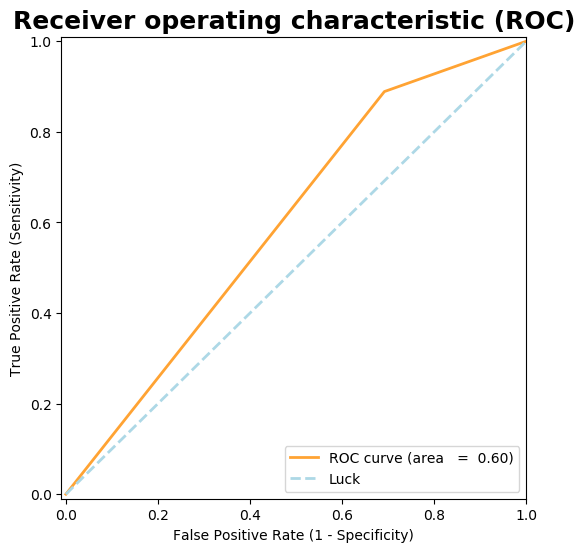

In [18]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold', fontsize =18)
plt.legend(loc= "lower right")

##### Plot with probabilities

In [19]:
# define probabilities of prediction
probas1_ = logReg1.fit(feature_train, response_train).predict_proba(feature_test)

In [21]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas1_[:, 1])
roc_auc = metrics.auc(fpr , tpr)

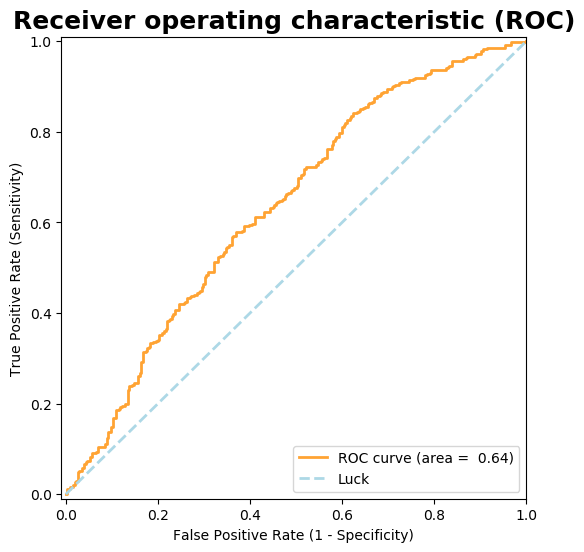

In [22]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr, lw=2,
         label = 'ROC curve (area = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

### 3.3.2. LogReg2: classweight balanced

In [23]:
# Create k-Fold CV and LogReg object
kFold = StratifiedKFold(n_splits =5, random_state =0)
logReg2 = LogisticRegression(class_weight = 'balanced')
# Run CV and print results
scores =  cross_val_score(logReg2, feature_train, response_train, cv= kFold )
print(scores)
print('CV accuracy on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

[0.56 0.59 0.57 0.61 0.58]
CV accuracy on train set:  0.582 +/-  0.017


In [24]:
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'roc_auc')
print ('CV  AUC on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

CV  AUC on train set:  0.614 +/-  0.021


In [25]:
# Calculate return
measures = ['accuracy', 'recall', 'roc_auc']
scores = cross_validate(logReg2, feature_train, response_train, cv=kFold, scoring = measures, n_jobs =2)
scores

{'fit_time': array([0.2 , 0.24, 0.21, 0.22, 0.19]),
 'score_time': array([0.18, 0.32, 0.07, 0.08, 0.06]),
 'test_accuracy': array([0.56, 0.59, 0.57, 0.61, 0.58]),
 'test_recall': array([0.57, 0.57, 0.52, 0.57, 0.58]),
 'test_roc_auc': array([0.59, 0.64, 0.6 , 0.64, 0.61]),
 'train_accuracy': array([0.6 , 0.58, 0.59, 0.59, 0.59]),
 'train_recall': array([0.57, 0.56, 0.58, 0.57, 0.56]),
 'train_roc_auc': array([0.63, 0.62, 0.63, 0.62, 0.63])}

In [26]:
# print scores
print('Train set accuracy (CV=5): ' ,scores ['train_accuracy'].mean())
print('Validation set scores (CV=5): ',scores ['test_accuracy'].mean())
print('Test set accuracy : ',logReg2.fit(feature_test , response_test).score(feature_test, response_test))

Train set accuracy (CV=5):  0.5900029065467209
Validation set scores (CV=5):  0.5818076060955008
Test set accuracy :  0.6380281690140845


#### Prediction

In [27]:
# define y predicted
y_pred2 = logReg2.fit(feature_train, response_train).predict(feature_test)
display(y_pred2[0:20])

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [28]:
print("")
print('Metrics of Classification with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.classification_report(response_test, y_pred2))
print("")
print('Confusion Matrix with SVM1 (random parameters), kernel rbf:')
print("")
print(metrics.confusion_matrix(response_test, y_pred2))


Metrics of Classification with SVM1 (random parameters), kernel rbf:

             precision    recall  f1-score   support

          0       0.53      0.62      0.57       305
          1       0.67      0.58      0.62       405

avg / total       0.61      0.60      0.60       710


Confusion Matrix with SVM1 (random parameters), kernel rbf:

[[188 117]
 [169 236]]


#### Plot Confusion matrix non normalized

Confusion matrix, without normalization
[[188 117]
 [169 236]]


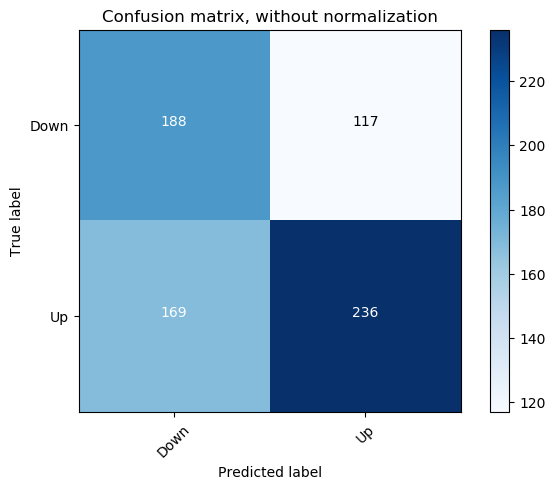

In [29]:
import itertools
plt. style .use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred2)
np.set_printoptions ( precision =2)
# Plot non-normalized confusion matrix
plt.figure ()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix, without normalization')

#### Plot normalized confusion matrix

Normalized confusion matrix
[[0.62 0.38]
 [0.42 0.58]]


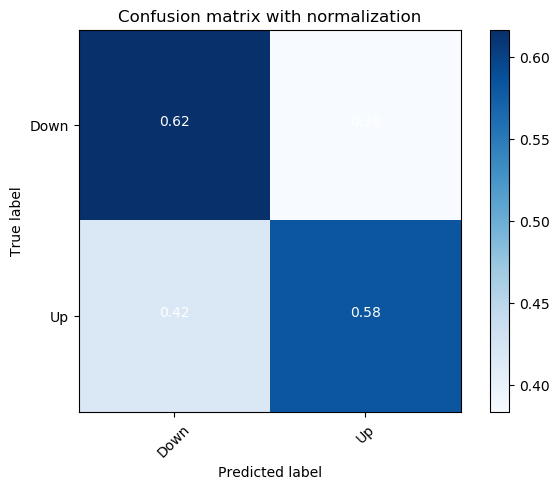

In [30]:
import itertools
plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize= True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cfm_matrix = metrics.confusion_matrix(response_test , y_pred2)
np.set_printoptions( precision =2)
# plot normalized   confusion   matrix
plt.figure()
plot_confusion_matrix(cfm_matrix, classes =['Down', 'Up'],
                      title = 'Confusion matrix with normalization')

##### different precision scores

In [31]:
print('Precision scores for different input data')
print(55*'_')
print('')
# precision train set
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'precision')
print('CV precision on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision test set
scores = cross_val_score(logReg2, feature_test, response_test, cv=kFold , scoring = 'precision')
print('CV precision on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision prediction
scores = cross_val_score(logReg2, feature_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# precision y true and y predicted set
scores = cross_val_score(logReg2, response_test, y_pred1, cv=kFold , scoring = 'precision')
print('CV precision on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')

Precision scores for different input data
_______________________________________________________

CV precision on train set:  0.666 +/-  0.021

CV precision on test set:  0.660 +/-  0.042

CV precision on test prediction set:  0.981 +/-  0.008

CV precision on prediction set:  0.890 +/-  0.026



##### different recall scores

In [32]:
print('Recall scores for different input data')
print(55*'_')
print('')
# recall train set
scores = cross_val_score(logReg2, feature_train, response_train, cv=kFold , scoring = 'recall')
print('CV recall on train set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall test set
scores = cross_val_score(logReg2, feature_test, response_test, cv=kFold , scoring = 'recall')
print('CV recall on test set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall prediction
scores = cross_val_score(logReg2, feature_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on test prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))
print('')
# recall y true and y predicted set
scores = cross_val_score(logReg2, response_test, y_pred1, cv=kFold , scoring = 'recall')
print('CV recall on prediction set: {0: .3f} +/- {1: .3f}'.format(np.mean(scores), np.std(scores)))

Recall scores for different input data
_______________________________________________________

CV recall on train set:  0.563 +/-  0.020

CV recall on test set:  0.598 +/-  0.071

CV recall on test prediction set:  0.890 +/-  0.021

CV recall on prediction set:  0.630 +/-  0.024


#### Plot ROC_AUC curve

##### Plot with absolut numbers

In [33]:
 #   Compute   ROC   curve   and   ROC   area   (AUC)   for   each   class
fpr, tpr, thresholds = metrics.roc_curve(response_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

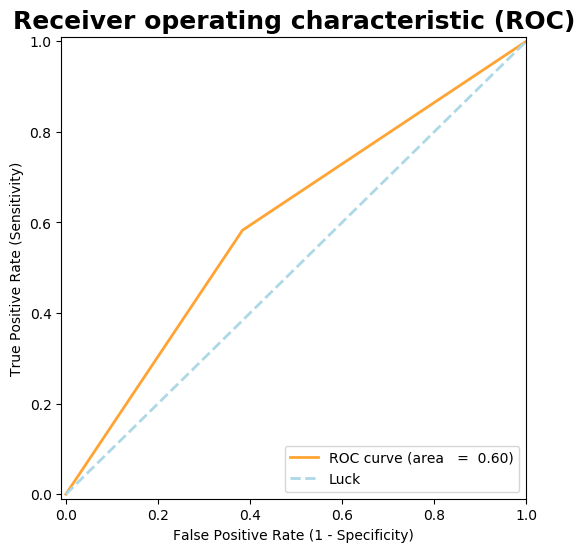

In [34]:
plt.figure(figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color= 'darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k',   linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

##### Plot with probabilities

In [35]:
# define probabilities of prediction
probas2_ = logReg2.fit(feature_train, response_train).predict_proba(feature_test)

In [36]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(response_test, probas2_[:, 1])
roc_auc   =   metrics.auc(fpr , tpr)

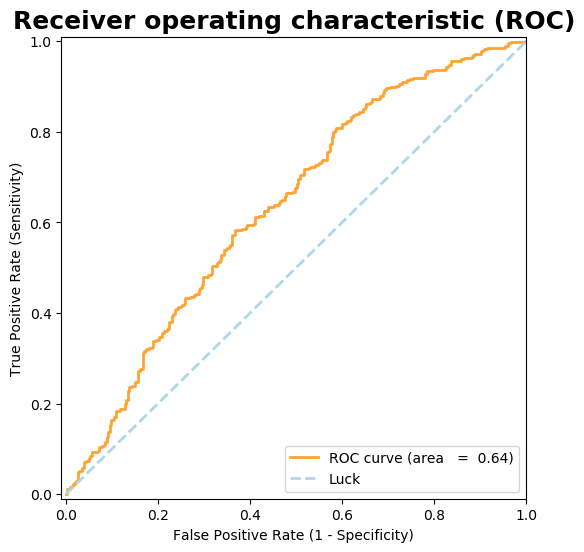

In [37]:
plt. figure (figsize =(6,   6))
plt.plot(fpr, tpr ,   lw=2,
         label = 'ROC curve (area   = {0: 0.2f})'.format(roc_auc), color ='darkorange', alpha = .8)
plt.plot([0, 1], [0, 1], lw=2, c = 'k', linestyle ='--', label = 'Luck', color = 'lightblue')
plt.xlim([-0.01, 1.0 ])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC)', fontweight ='bold',   fontsize =18)
plt.legend(loc= "lower right")

## Result

In [ ]:
# -> best combination of scores and confusion matrix is logReg2 with balanced classweight even though ROC curve is quite weak
# the suggested parameters from gridsearch for LogReg aren't as good as expected (unuseful confmatrix) which is quite suprising